In [1]:
import pandas as pd
import numpy as np

In [2]:
import FinanceDataReader as fdr

In [3]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
pd.set_option('display.max_rows', 100)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
from matplotlib import font_manager, rc
rcParams['axes.unicode_minus'] = False

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 1.주가데이터를 불러옵니다.

In [6]:
import FinanceDataReader as fdr

In [7]:
df = fdr.DataReader('360750', '2020-08-01') #TIGER 미국S&P500

## 2. 단순지수평활법

In [13]:
# 초기값에 많은 가중치를 두고, 과거에 갈수록 가중치가 줄어드는 구조

In [14]:
df2 = df.copy()

In [15]:
df2 = df2.reset_index()

In [16]:
df2['es'] = None #  단순지수평활벌

In [18]:
df2.head(15)

,Date,Close,es
0,2020-08-07,9761,None
1,2020-08-10,9785,None
2,2020-08-11,9795,None
3,2020-08-12,9757,None
4,2020-08-13,9805,None
5,2020-08-14,9843,None
6,2020-08-18,9838,None
7,2020-08-19,9857,None
8,2020-08-20,9800,None
9,2020-08-21,9881,None


In [19]:
df2.loc[df2.index[9], 'es'] =  df2.loc[df2.index[0:10], 'Close'].mean() # 초기값, index 0 - 9 까지 10

In [20]:
df2.head(15)

,Date,Close,es
0,2020-08-07,9761,None
1,2020-08-10,9785,None
2,2020-08-11,9795,None
3,2020-08-12,9757,None
4,2020-08-13,9805,None
5,2020-08-14,9843,None
6,2020-08-18,9838,None
7,2020-08-19,9857,None
8,2020-08-20,9800,None
9,2020-08-21,9881,9812.2


In [22]:
alpha = 0.4

In [27]:
for i in range(10, df2.shape[0]):

    df2.loc[df2.index[i], 'es'] = alpha * df2.loc[df2.index[i], 'Close'] + (1-alpha)* df2.loc[df2.index[i-1],'es']

In [28]:
df2

,Date,Close,es
0,2020-08-07,9761,None
1,2020-08-10,9785,None
2,2020-08-11,9795,None
3,2020-08-12,9757,None
4,2020-08-13,9805,None
...,...,...,...
618,2023-02-09,13075,12999.800732
619,2023-02-10,12910,12963.880439
620,2023-02-13,13040,12994.328263
621,2023-02-14,13130,13048.596958


In [33]:
df2['forecast'] = df2['es'].shift(1)

In [30]:
df2

,Date,Close,es,forecast
0,2020-08-07,9761,None,NaN
1,2020-08-10,9785,None,NaN
2,2020-08-11,9795,None,NaN
3,2020-08-12,9757,None,NaN
4,2020-08-13,9805,None,NaN
...,...,...,...,...
618,2023-02-09,13075,12999.800732,12949.667886
619,2023-02-10,12910,12963.880439,12999.800732
620,2023-02-13,13040,12994.328263,12963.880439
621,2023-02-14,13130,13048.596958,12994.328263


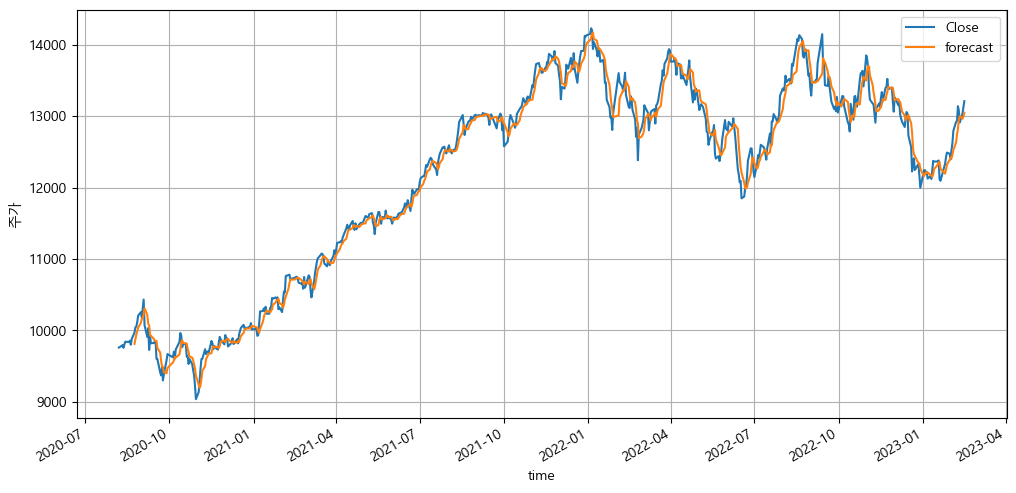

In [31]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 6), sharex=True)
df2.plot(x = 'Date', y='Close', ax=ax)
df2.plot(x = 'Date', y='forecast',  ax=ax)
ax.set(xlabel="time", ylabel="주가")
ax.grid(True)
#plt.savefig("tsRegression01.png", dpi=150, bbox_inches='tight')
plt.show()

In [60]:
#df1.to_csv('C:/HSCHUNG/PYTHON/B_CLASS/B_AppliedDataAnalysis/DATA/w10_ma_es1.csv')

In [34]:
df2['er'] = df2['forecast'] - df2['Close']

In [35]:
df2 = df2.dropna()

In [37]:
error = df2['er'].to_numpy()

In [38]:
error2 = []

for i in range(len(error)):
    er2 = error[i] ** 2
    error2.append(er2)

In [39]:
sse = np.sum(error2)

In [40]:
np.round(sse,2)

14891901.42